### Let $x_k$ and $x_{k_1}$ be two sets of corresponding points w.r.t frame 1 and 2. We wish to find a rigid transformation between frame 1 and frame 2.

$\overline{x_k}$ and $\overline{x_{k_1}}$ are the means of the set of points.

Then the rotation w.r.t frame2 to frame1 given as
$$R=VU^T$$

Where $$USV=svd [(x_k-\overline{x_k})(x_{k_1}-\overline{x_{k_1}})^T]$$

Then the translation is given by,
$$t=\overline{x_{k_1}}-R\overline{x_k}$$

In [30]:
clear all
close all

# These are the functions related to rotation and translaton about x,y,z axis
function y=Trans(a,b,c)
  y=[1 0 0 a;0 1 0 b;0 0 1 c;0 0 0 1];
end

function y=Rotx(k)
  y=[1 0 0 0;0 cos(k) -sin(k) 0;0 sin(k) cos(k) 0;0 0 0 1];
end

function y=Roty(k)
  y=[cos(k) 0 sin(k) 0;0 1 0 0;-sin(k) 0 cos(k) 0;0 0 0 1];
end

function y=Rotz(k)
  y=[cos(k) -sin(k) 0 0;sin(k) cos(k) 0 0;0 0 1 0;0 0 0 1];
end

#--------------------------------------------------------------------------------------------------------
#calclating an arbitrary homogeneous trasformation
H21=Trans(1.6,0.5,0.7)*Rotx(0.3)*Roty(0.1)*Rotz(0.4);#transformation frame 1 to frame 2
#H21=Rotx(0.8);#frame 1 to frame 2 (w.r.t 1)

#finding the inverse of the above homogeneous transform
r=[[H21(1,1:3)];[H21(2,1:3)];[H21(3,1:3)]];
d=[[H21(1,4)];[H21(2,4)];[H21(3,4)]];
H12=vertcat(horzcat(r',-r'*d),[0 0 0 1]);#transformation frame 2 to frame 1

N=10; #enter number of points need to generate
r1=rand(3,N)*10; #generate N number of points
r2=ones(1,length(r1));
xk=vertcat(r1,r2)


xk1=H12*xk #same point coordinates w.r.t frame2

#adding noise to the frame 2 coordinates
noise=randn(3,length(xk1(1,:)));
noise=vertcat(noise,zeros(1,length(xk1(1,:))));
disp("xk1 with noise")
xk1=xk1.+noise

#--------------------------------------------------------------------------------------------------------

#compute mean
xk_m=[mean(xk(1,:));mean(xk(2,:));mean(xk(3,:))];
xk1_m=[mean(xk1(1,:));mean(xk1(2,:));mean(xk1(3,:))];

#compute centered vectors
X=(xk(1:3,:)-xk_m);
Y=(xk1(1:3,:)-xk1_m);

#compute covarience matrix
CV=X*Y';

#compute singular value decomposition
[U, S, V] =svd(CV);
#copute rotation
 rot=V*U';
#compute translation
 trans=xk1_m-rot*xk_m;
 
 
 
Ek_using_SVD=vertcat(horzcat(rot,trans),[0 0 0 1]); #this is the transformation frame2 to frame1
Ek_using_SVD=inv(Ek_using_SVD) #transformation frame1 to frame2
#-------------------------------------------------------------------------------------------------------

Ek_using_least_squares=(xk*xk1')*inv(xk1*(xk1'))

Ek_original = H21


xk =

 Columns 1 through 8:

   5.55971   0.54527   8.37545   1.84571   2.60079   2.95660   3.22924   1.85329
   1.54147   5.96533   3.30466   9.79157   5.44564   0.48077   4.36175   3.81806
   8.27458   1.11578   5.16967   3.01217   8.66869   2.73455   4.52364   0.32863
   1.00000   1.00000   1.00000   1.00000   1.00000   1.00000   1.00000   1.00000

 Columns 9 and 10:

   1.59554   3.01388
   1.20066   8.70180
   7.26410   6.52968
   1.00000   1.00000

xk1 =

 Columns 1 through 7:

   4.250958   1.226466   7.450776   3.997350   3.108506   1.290998   3.138881
   1.713231   5.283575   1.192977   8.689144   6.372158   0.087005   3.905168
   7.289194  -1.317119   4.100428  -0.509730   6.220429   2.075059   2.661737
   1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

 Columns 8 through 10:

   1.546584   0.454392   4.728687
   2.668494   2.640696   8.378191
  -1.303375   6.033122   3.270944
   1.000000   1.000000   1.000000

xk1 with noise
xk1 =

 Columns 1 thro

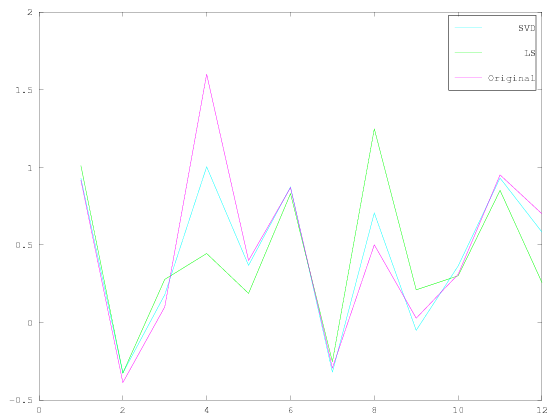

In [33]:
#comparing all 12 elements of calculated Ek with original Ek
SVD=[Ek_using_SVD(1,:) Ek_using_SVD(2,:) Ek_using_SVD(3,:)];
LS=[Ek_using_least_squares(1,:) Ek_using_least_squares(2,:) Ek_using_least_squares(3,:)];
Original=[Ek_original(1,:) Ek_original(2,:) Ek_original(3,:)];

plot(SVD,'c','LineWidth',1)
hold on
plot(LS,'g','LineWidth',1)
plot(Original,'m','LineWidth',1)
legend('SVD','LS','Original')